Jesswin CAT-1

In [ ]:
Q1

In [2]:
import pandas as pd
import numpy as np

In [3]:
x = (np.random.rand(1000)*100)
x= np.asarray(x,dtype='int')
y = x+np.random.normal(0,75,1000)
y= np.asarray(y,dtype='int')

In [4]:
x,y

(array([53, 38, 49, 50, 99,  7,  4, 80, 78, 87, 56, 15, 30, 40, 42,  0, 12,
        85, 96, 71, 73, 39, 24, 52, 97, 46, 61, 51, 32, 70, 80, 78, 24, 65,
        99, 40, 79,  3, 57, 99, 40, 15, 78, 15, 52, 34, 73, 10, 23, 35, 32,
        67, 12, 13, 46, 83, 41, 33, 25, 66, 31, 48, 61, 33, 49, 91, 42, 88,
        12, 32, 67, 15, 55, 82, 68, 92, 32, 50, 40, 66, 28,  2, 47, 10, 87,
        34,  5, 91, 50, 71, 33, 77, 14, 77, 19, 95, 17, 32, 95, 89, 96,  6,
        67, 88, 31, 74,  1, 28, 34, 18, 67, 79, 59,  2, 78, 85, 99, 99, 59,
        47, 76, 54, 85, 19, 94, 89, 59, 48, 49, 78, 88, 17, 86, 73, 35, 58,
        90, 61, 95, 58, 61, 93, 99, 32, 22, 20, 16, 26, 86, 78, 31,  4, 48,
        71, 70, 13,  6, 12, 90, 73, 65, 38, 36, 10, 49, 67, 20, 97, 72, 24,
        17, 57, 89, 31,  0, 48, 32, 45, 70, 45, 28, 94,  3, 67, 34, 90, 77,
         8, 41, 38, 14, 98,  1, 14, 76, 84, 90, 74, 22, 36, 61, 11, 70,  6,
        79, 35, 80, 31, 78, 47, 90,  6, 81, 71, 72, 71,  1, 95, 85, 64, 46,
         6, 

Q2

In [5]:
inds = np.random.permutation(len(x))
size = round(len(x)*0.7)
train,test = inds[:size],inds[size:]

In [6]:
x_train,x_test,y_train,y_test = x[train],x[test],y[train],y[test]

In [7]:
m_scr = ((x_train-x_train.mean())*(y_train-y_train.mean())).sum()/((x_train-x_train.mean())**2).sum()
c_scr = y_train.mean()-(x_train.mean()*m_scr)
m_scr,c_scr

(1.0810164904637891, -7.562490146856547)

In [8]:
y_pred_scr = c_scr + (m_scr*x_test)

In [9]:
def accuracy(y_pred,y_test):
    print("mae :",np.abs(y_test-y_pred).mean())
    print("rmse :",(((y_test-y_pred)**2).mean())**0.5)

In [10]:
accuracy(y_pred_scr,y_test)

mae : 58.607012667977095
rmse : 71.90798510169517


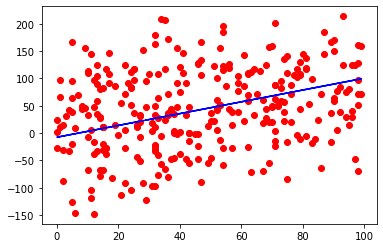

In [11]:
import matplotlib.pyplot as plt
plt.plot(x_test,y_pred_scr,c="b")
plt.scatter(x_test,y_test,c="r")

Q3 

In [27]:
m,c = 0,0

In [28]:
l = 0.0001
epochs = 30000
n = float(len(x_train))

In [37]:
for i in range(epochs): 
    temp_y= m*x_train + c
    temp_m = (-2/n) * sum(x_train * (y_train - temp_y))
    temp_c = (-2/n) * sum(y_train -temp_y)
    m = m - l * temp_m
    c = c - l * temp_c

In [38]:
m,c

(1.0581121149995618, -6.015531774329411)

In [33]:
y_pred = m*x_test + c

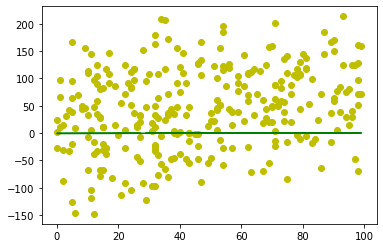

In [34]:
plt.plot(x_test,y_pred,c="g")
plt.scatter(x_test,y_test,c="y")

In [35]:
accuracy(y_pred,y_test)

mae : 70.66497955043582
rmse : 86.13627860921603


Q4

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression()

In [20]:
c_skl = reg.intercept_[0]
m_skl = reg.coef_[0,0]

In [21]:
y_pred_skl = reg.predict(x_test.reshape(-1,1))

In [22]:
accuracy(y_pred_skl,y_test)

mae : 64.91714518219355
rmse : 79.91814738257773


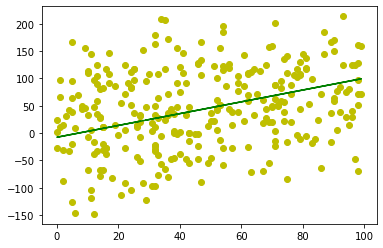

In [36]:
plt.scatter(x_test,y_test,c="y")
plt.plot(x_test,y_pred_skl,c="g")